In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def find_mean(cm):
    data = np.genfromtxt('histograms_csv/{}cm.csv'.format(cm),unpack=True,skip_header=5,delimiter=',')
    voltage = data[0] 
    counts = data[1]
    
    # exclude 0
    for i, v in enumerate(voltage):
        if v < 0.1:
            voltage = np.delete(voltage, i)
            counts = np.delete(counts, i)
    mean = np.average(voltage, weights=counts)
    return mean

def efficiency(cm):
    data = np.genfromtxt('histograms_csv/{}cm.csv'.format(cm),unpack=True,skip_header=5,delimiter=',')
    voltage = data[0]
    counts = data[1]
    
    zero_count = 0
    for i, v in enumerate(voltage):
        if v < 0.1:
            zero_count += 1
            
    print("For {} cm, {} excluded".format(cm, zero_count))
    return zero_count/len(counts)

def gen_hist(cm):
    data = np.genfromtxt('histograms_csv/{}cm.csv'.format(cm),unpack=True,skip_header=5,delimiter=',')
    voltage = data[0]
    counts = data[1]

    fig, ax = plt.subplots(figsize=(7,5),dpi=100)
    ax.tick_params(direction="in", which="both")
    ax.stem(voltage, counts, label = "{} cm".format(cm), markerfmt=' ', basefmt=" ")
    ax.legend(frameon=False)
    
    mean = find_mean(cm)
    ax.text(1,20, "mean = " + str(round(mean,3)))
    ax.text(1,17, "std = " + str(round(mean**0.5,2)))
    ax.text(1,14, "efficiency = " + str(efficiency(cm)))
    ax.set(xlabel = "Voltage [V]", ylabel = "Counts")
    
    plt.savefig("histograms/{}.png".format(cm))

/home/harper/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


For 4 cm, 24 excluded
For 4 cm, 24 excluded
0.24
For 14 cm, 24 excluded
For 14 cm, 24 excluded
0.24
For 24 cm, 24 excluded
For 24 cm, 24 excluded
0.24
For 34 cm, 24 excluded
For 34 cm, 24 excluded
0.24
For 44 cm, 24 excluded
For 44 cm, 24 excluded
0.24


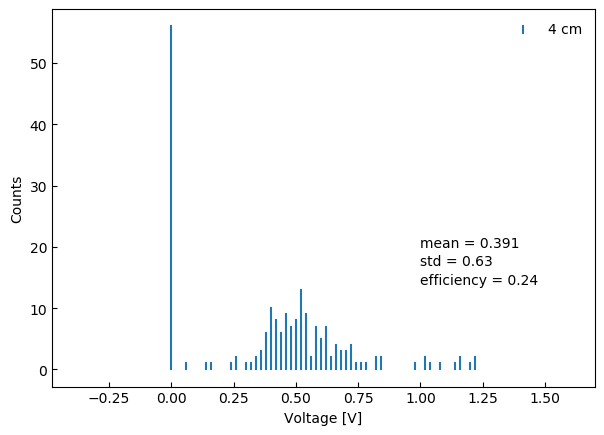

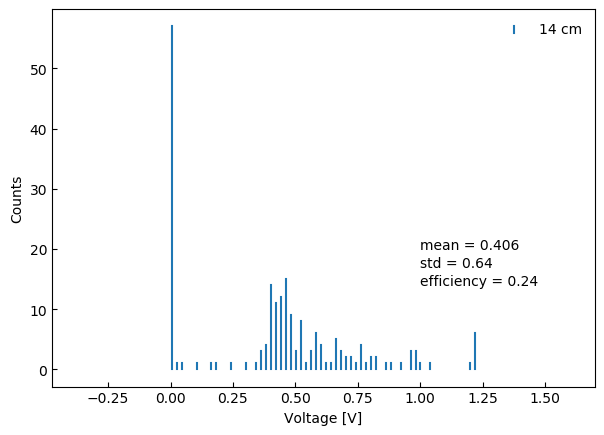

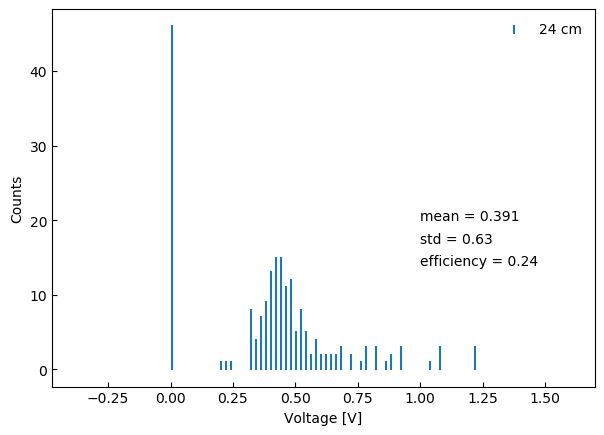

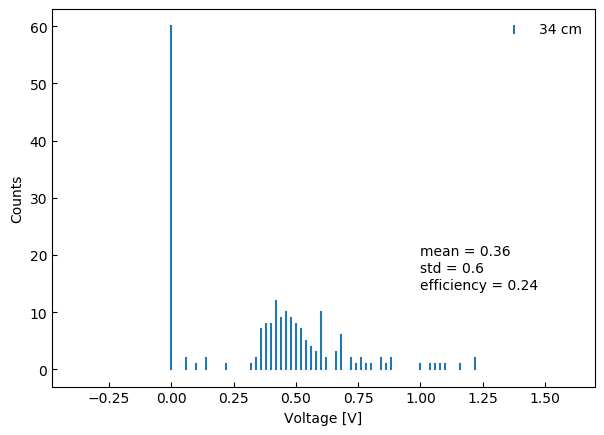

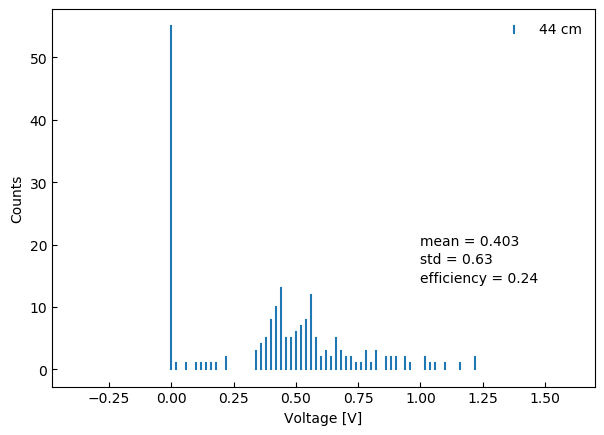

In [8]:
cm_list = np.array([4, 14, 24, 34, 44])

for cm in cm_list:
    gen_hist(cm)
    print(efficiency(cm))

No handles with labels found to put in legend.


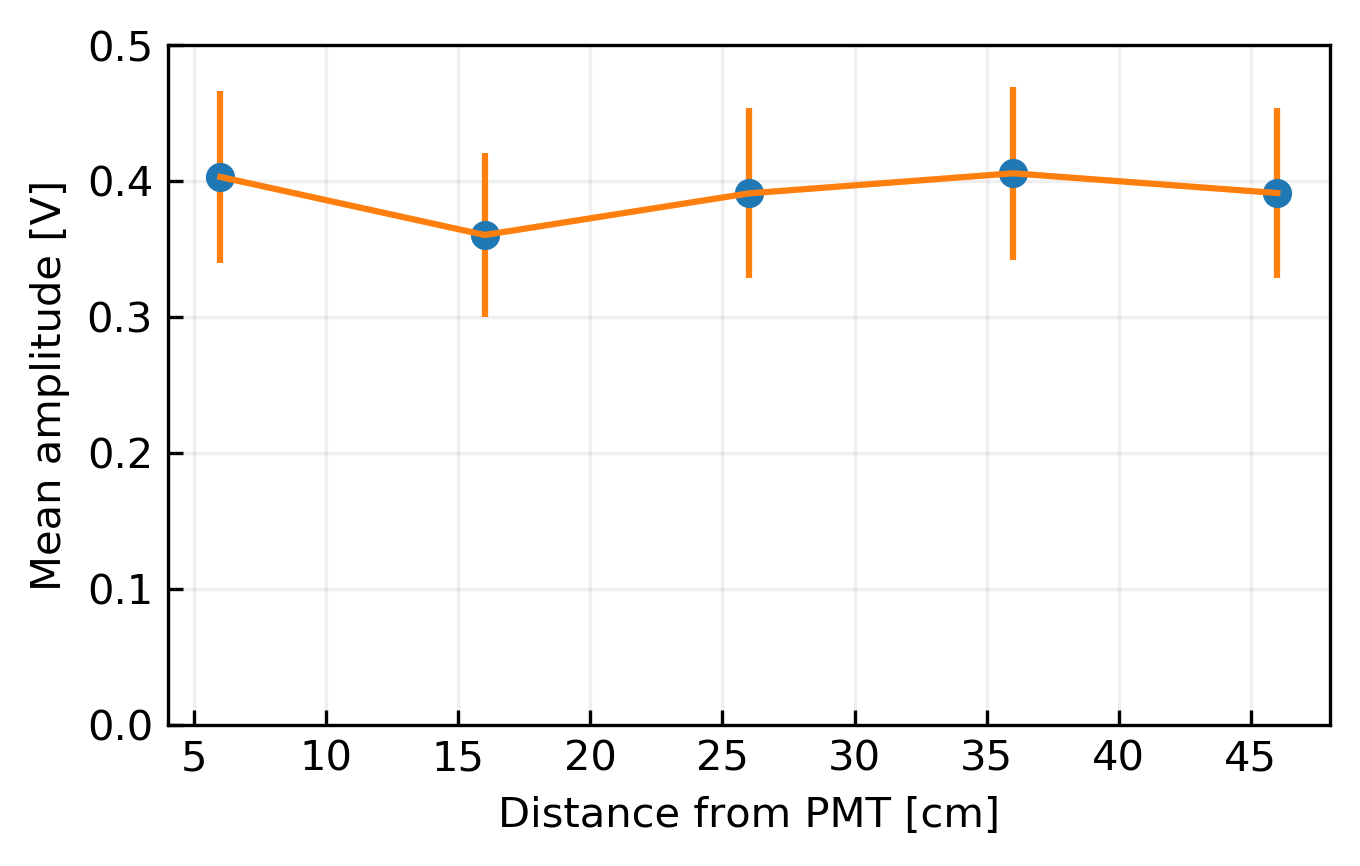

In [12]:
fig, ax = plt.subplots(figsize=(5,3), dpi=300)
mean_list = np.array([find_mean(cm) for cm in cm_list])
correct_cm = [50-cm for cm in cm_list]

ax.plot(correct_cm, mean_list, marker = 'o', linestyle="none")
ax.errorbar(correct_cm, mean_list, yerr = (mean_list**0.5)/10)
ax.set(xlabel="Distance from PMT [cm]", ylabel = "Mean amplitude [V]")
ax.tick_params(direction="in", which="both")
ax.grid(alpha=0.2)
ax.legend(frameon=False)
ax.set_ylim(ymin=0, ymax=0.5)


plt.savefig("./reports/AmplitudeDistance.png")

In [6]:
eff_list = [efficiency(cm) for cm in cm_list]


OSError: histograms/4cm.csv not found.